<Body>   
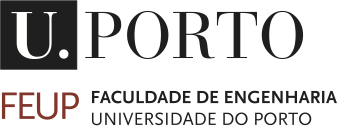   
<h1> <b>Control and Optimization 2023/2024 (2<sup>nd</sup> semester) </b> </h1>
<p>Master in Electrical and Computer Engineering </p>
<p>Department of Electrical and Computer Engineering</p>
</Body>  

**Professors:**

**A. Pedro Aguiar** (pedro.aguiar@fe.up.pt),
**M. Rosário Pinho** (mrpinho@fe.up.pt)

FEUP, Feb. 2024

---


# **Project - Part 1**

**Note:** This is to be done in group of **3** elements. Use this notebook to answer all the questions. At the end of the work, you should **send** the **notebook** and a **pdf file** with a printout of the notebook with all the results.

**Deadlines:** Present the state of your work (and answer questions) on the week of **April 1st** in your corresponding practical class. Send the files until 23:59 of **May 31, 2024**.


---



In [427]:
# To make a nice pdf file of this file, you have to do the following:
# - upload your file to print into the running folder (click on the corresponding left icon)
# Then run this (which will make a html file into the current folder):
!jupyter nbconvert --to html "name_of_the_file.ipynb"
# Then just download the html file and print it to pdf!

[NbConvertApp] WARNING | pattern 'name_of_the_file.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execut

# **Identification**

* **Group:** 07
* **Name:** Bruno Filipe Torres Costa
* **Student Number:** 202004966

* **Name:**
* **Student Number:**

* **Name:**
* **Student Number:**

---




# An Autonomous Underwtare Vehicle (UAV) model in the vertical plan


<Body>   
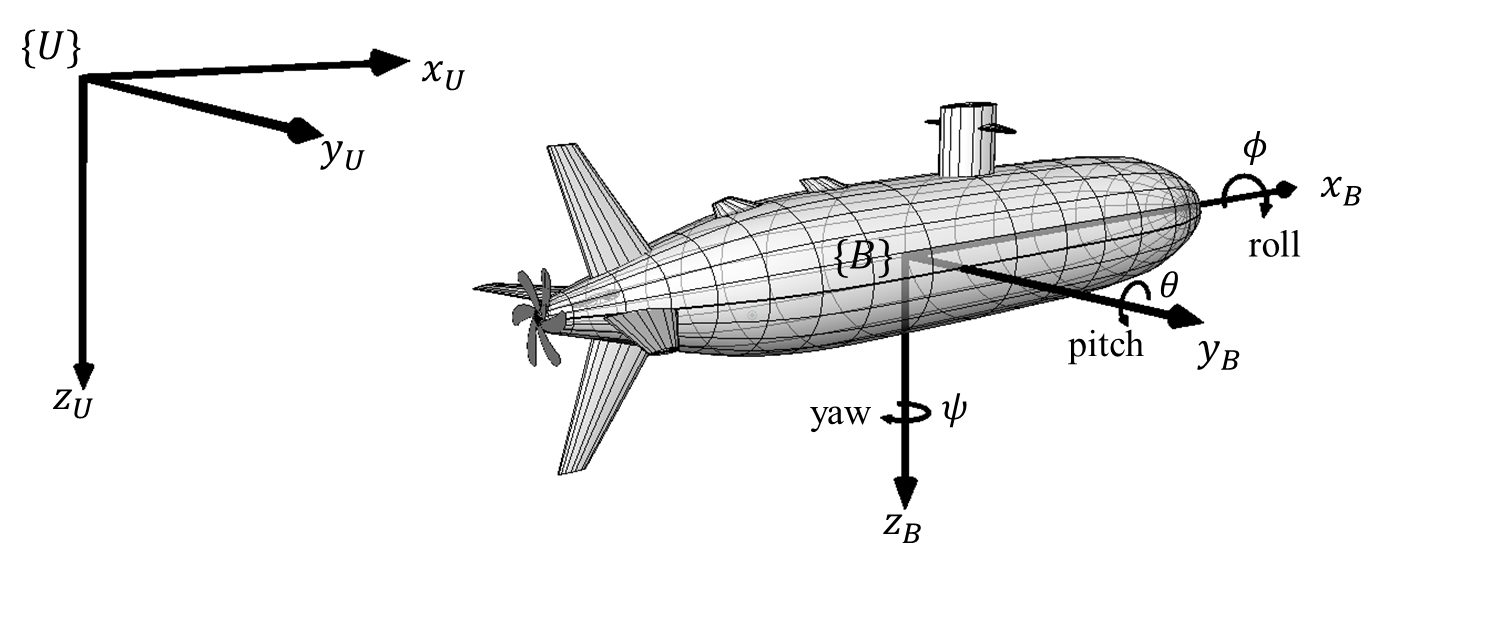

Fig. 1. Coordinate frames, position and orientation variables of an AUV.


Consider an Autonomous Underwater Vehicle (AUV) illustrated in Fig. 1 that can only generate force in $x_B$-direction by means of an actuator composed of an electric motor with a propeller coupled to the shaft.

In this work, the final goal is to design a tracking controller in the vertical plane so that that the vehicle will move according to a desired depth trajectory.


In the vertical plane, the kinematic equations take the form

\begin{align}
 \dot x &= u\cos \theta  + w\sin \theta  \\
 \dot z &=  - u\sin \theta  + w\cos \theta  \\
 \dot \theta  &= q
\end{align}

where $u$, $w$ and $q$ are the linear and angular velocities of the  vehicle, respectively, in surge ($x_B$), heave ($z_B$) and pitch ($\theta$) direction of the body-fixed coordinates $\{B\}$. The Cartesian coordinates of the vehicle's center of mass is denoted by $x$ and $z$, and $\theta$ is the pitch angle.

The simplified equations of motion for surge, heave, and pitch rate when there is no actuated force in $Z_B$ direction (that is, the vehicle is underactuated) yield

\begin{align}
{m_u}\dot u + {m_w}wq + {d_u}(u)u &= \tau_u \\
{m_w}\dot w - {m_u}uq + {d_w}(w)w &= 0 \\
{m_q}\dot q + {m_{uw}}uw + {d_q}(q)q - z_BB\sin\theta &= \tau_q
\end{align}

where $m_u=m-X_{\dot{u}}$, $m_w=m-Z_{\dot{w}}$, $m_q=I_y-M_{\dot q}$ and $m_{uw}=m_u-m_w$ are mass and hydrodynamic added mass terms, $B$ denotes the buoyancy, and the hydrodynamic damping effects are considered to be of the form

\begin{align}
d_u(u) &=-X_u-X_{u|u|}|u| \\
d_w(w) &=-Z_w-Z_{w|w|}|w| \\
d_q(q) &=-M_q-M_{q|q|}|q|
\end{align}


In the above equations, it is assumed that the AUV is neutrally buoyant and that the center of buoyancy can be expressed as $(x_B, y_B, z_B) = (0,0, z_B)$, where $z_B$ is the metacentric height.
The symbols $\tau_u$ and $\tau_q$ denote the actuated force in surge direction and  torque around the $y$-axis of the vehicle, respectively.



# **Part 1: Stability analysis**



We take the practical situation that there exist autopilots controllers in charge of tracking reference signals in $u$ and $q$. Thus, we consider at this stage that the actuation signals are $u$ and $q$.

**1.1** Show that the speed controller given by

\begin{equation}
u = \frac{{{v_d} - w\sin \theta }}{{\cos \theta }}
\end{equation}

forces the AUV to move with a constant horizontal velocity $v_d$, that is, $\dot x = v_d$. Show also that in this case the equations of motion in the vertical plane of the AUV  reduces to

$\color{blue}{AUV\ model}$

\begin{align*}
\dot x &= v_d \\
\dot z &= - v_d \tan\theta + \frac{1}{\cos\theta}w \\
\dot w &=d_1 w + d_2 w|w| + \bar m \left(\frac{v_d}{\cos\theta} - w\tan\theta\right)q \\
\dot\theta &= q
\end{align*}

where $z$ is the vertical position (depth) of the AUV, $w$ is the linear velocity along the axis $z_B$ (*heave*), $\theta$ is the angle of *pitch*, and $q$ is the angular velocity around the axis $y_B$.


In the sequel, we will consider that system parameters have the following values (in appropriate units):
$v_d = 1$; $d_1= -3$; $d_2 = -12$, $\bar m = 0.9$

**1.2.**
Let $z_d$ be a given desired depth. Defining the state ${\bf x} = (z-z_d,w,\theta)^⊤$, input ${\bf u}=q$, output ${\bf y}=z-z_d$, write the system in state-space form and linearize it around the origin ${\bf x=0}$.

Explain here ...

In [428]:
# System Linearization

import sympy as sp

# Define symbols
x1, x2, x3 = sp.symbols('x1 x2 x3')
vd, d1, d2, m, q = sp.symbols('v_d d_1 d_2 m q')

# Define state vector and input
x = sp.Matrix([x1, x2, x3])
u = sp.Matrix([q])

# Define system equations
f = sp.Matrix([-vd * sp.tan(x3) + 1/sp.cos(x3) * x2,
               d1 * x2 + d2 * x2 * x2 + m * (vd/sp.cos(x3) - x2 * sp.tan(x3)) * q,
               q])

# Define output equation
g = sp.Matrix([x1])

# Compute Jacobians
A = f.jacobian(x)
B = f.jacobian(u)
C = g.jacobian(x)

# Substitute X = 0
A = f.jacobian(x).subs({x1: 0, x2: 0, x3: 0})
B = f.jacobian(u).subs({x1: 0, x2: 0, x3: 0})
C = g.jacobian(x).subs({x1: 0, x2: 0, x3: 0})

# Print the Jacobians
print("Jacobian A:")
sp.pprint(A)
print("\nJacobian B:")
sp.pprint(B)
print("\nJacobian C:")
sp.pprint(C)

Jacobian A:
⎡0  1   -v_d⎤
⎢           ⎥
⎢0  d₁   0  ⎥
⎢           ⎥
⎣0  0    0  ⎦

Jacobian B:
⎡  0  ⎤
⎢     ⎥
⎢m⋅v_d⎥
⎢     ⎥
⎣  1  ⎦

Jacobian C:
[1  0  0]


**1.3.**
Analyze the stability of the origin ${\bf x = 0}$ with ${\bf u=0}$ of the linear and nonlinear system using the **Lyapunov indirect method**.

Explain here ...

In [429]:
# Lypaunov indirect method

import numpy as np


# Constants
vd = 1
d1 = -3
d2 = -12
m = 0.9
k1 = 1
k2 = 1
zd = 1

# Matrix A
A = np.array([[0.0, 1.0, -vd],
              [0.0, d1, 0.0],
              [0.0, 0.0, 0.0]])

# Matrix B
B = np.array([[0.0],
              [m*vd],
              [1.0]])

# Matrix C
C = np.array([1.0, 0.0, 0.0])

print('---Stability---')
# Eigenvalues of A
eigenvalues = np.linalg.eigvals(A)
print('Eigenvalues of A:', eigenvalues)

# Check if eigenvalues are all negative
if all(eigenvalue < 0 for eigenvalue in eigenvalues):
    print("Stable")
elif any(eigenvalue == 0 for eigenvalue in eigenvalues):
    print("On imaginary axis (cannot conclude stability of the nonlinear system)")
else:
    print("Unstable")

---Stability---
Eigenvalues of A: [ 0. -3.  0.]
On imaginary axis (cannot conclude stability of the nonlinear system)


**1.4**
For $z_d = 1\,m$, plot the **time-evolution** of the state for the nonlinear and linear systems (with $q=0$) for different initial conditions.

Use the numerical integrator `integrate.odeint` of `scipy`.

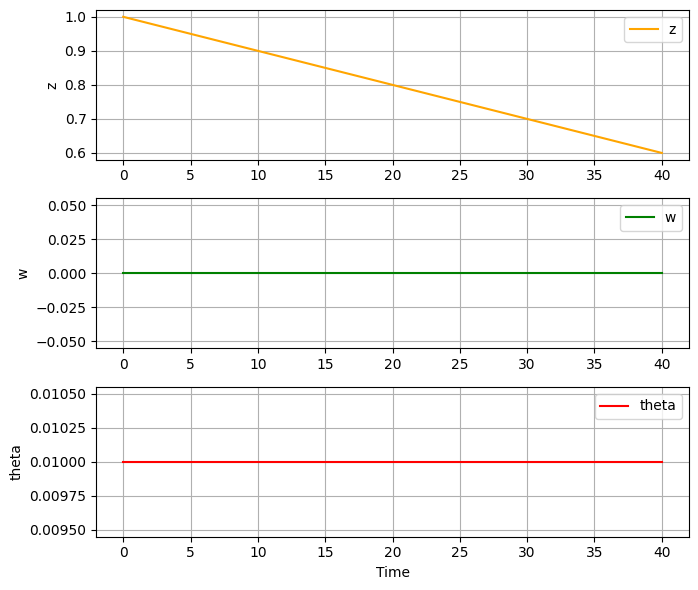

In [430]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

# Nonlinear System
def Sys_f(x, t=0):
  z = x[0]
  w = x[1]
  th = x[2]
  q = 0
  dx1 = -vd*np.tan(th) + w/np.cos(th)
  dx2 = -d1*w + d2*w*np.abs(w) + q*m*(vd/np.cos(th) - w*np.tan(th))
  dx3 = q
  return np.array([ dx1, dx2, dx3
                   ])

# Generate 1000 linearly spaced points for t
t_end = 40
t = np.linspace(0, t_end, 1000)

# Initial values
#x0 = np.array([zd, 0.00, 0.00], dtype=float)
x0 = np.array([zd, 0.00, 0.01], dtype=float)

# Call odeint with parameters
x, infodict = integrate.odeint(Sys_f, x0, t, full_output=True)
# infodict['message']                       # integration successful



# Plot
fig, axs = plt.subplots(3, 1, figsize=(7, 6))

axs[0].plot(t, x[:, 0], label='z', color='orange')
axs[0].set_ylabel('z')
axs[0].grid(True)
axs[0].legend()

axs[1].plot(t, x[:, 1], label='w', color='green')
axs[1].set_ylabel('w')
axs[1].grid(True)
axs[1].legend()

axs[2].plot(t, x[:, 2], label='theta', color='red')
axs[2].set_ylabel('theta')
axs[2].grid(True)
axs[2].legend()

plt.xlabel('Time')
plt.tight_layout()
plt.show()

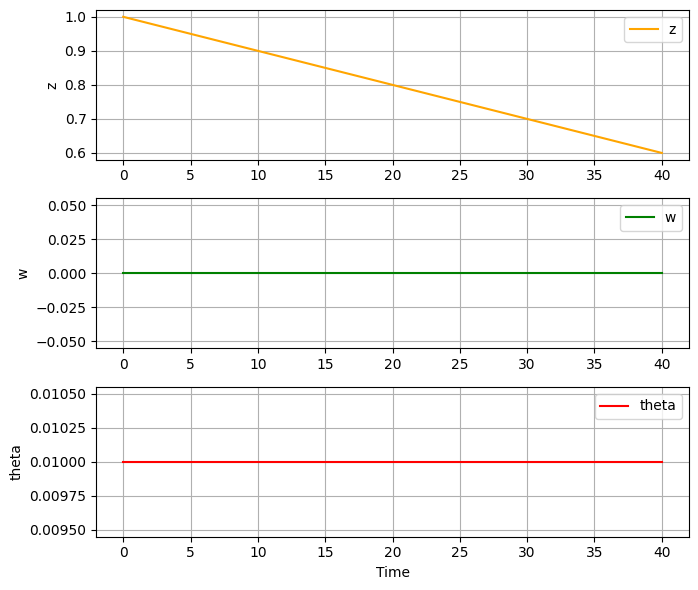

In [431]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt


# Linear System
def Sys_f_Linear(x, t=0):
  z = x[0]
  w = x[1]
  th = x[2]
  q = 0
  dx1 = w - vd*th
  dx2 = d1*w + m*vd*q
  dx3 = q
  return np.array([ dx1, dx2, dx3
                   ])

# Generate 1000 linearly spaced points for t
t_end = 40
t = np.linspace(0, t_end, 1000)

# Initial values
#x0 = np.array([zd, 0.00, 0.00], dtype=float)
x0 = np.array([zd , 0.00, 0.01], dtype=float)

# Call odeint with parameters
x, infodict = integrate.odeint(Sys_f_Linear, x0, t, full_output=True)
# infodict['message']                       # integration successful



# Plot
fig, axs = plt.subplots(3, 1, figsize=(7, 6))

axs[0].plot(t, x[:, 0], label='z', color='orange')
axs[0].set_ylabel('z')
axs[0].grid(True)
axs[0].legend()

axs[1].plot(t, x[:, 1], label='w', color='green')
axs[1].set_ylabel('w')
axs[1].grid(True)
axs[1].legend()

axs[2].plot(t, x[:, 2], label='theta', color='red')
axs[2].set_ylabel('theta')
axs[2].grid(True)
axs[2].legend()

plt.xlabel('Time')
plt.tight_layout()
plt.show()

**1.5**
Consider now the nonlinear subsystem $(\tilde z, \theta)$ with $\tilde z = z-z_d$, $q$ as input and assume that $w=0$.

Prove that the origin of the closed-loop system with control law
\begin{equation}
q = k_1 (z-z_d) - k_2 \theta \tag{1}
\end{equation}
with positive gains $k_1$ and $k_2$ (and $v_d>0$) is asymptotically stable. 
Use the Lyapunov function
\begin{equation}
V(\tilde z, \theta) = \frac{k_1}{2 v_d}\tilde z^2+\int_0^\theta \tan(\phi)d\phi
\end{equation}


**1.6**
For the above item, confirm the results through simulation by plotting the **time-evolution** of the state and in the **phase space** for different initial conditions with $k_1=k_2=1$.

In [432]:
import control

# Matrix A
A = np.array([[0.0, -vd],
              [0.0, 0.0]])

# Matrix B
B = np.array([[0.0],
              [1.0]])

# Controllability
print ('\n---Controllability---')
print ('rank of ctrb(A,b):' , np.linalg.matrix_rank( control.ctrb( A, B ) ))
print ('Eigenvalues of A:', np.linalg.eig( A )[0])


# Pole Placement
K = control.place( A, B, [-1, -2] )
K = np.array([ [-k1], [k2]]).T
print ('\n---Pole Placement\nK=:', K)

# Verification of Eigen values of A-BK
print ('\n---Verification of Eigenvalues of A-BK---')
Acl = A - B @ K
#print(Acl)
eig_Acl, eig_vect = np.linalg.eig( Acl )
print ('Eigenvalues of A-BK:', eig_Acl)


---Controllability---
rank of ctrb(A,b): 2
Eigenvalues of A: [0. 0.]

---Pole Placement
K=: [[-1  1]]

---Verification of Eigenvalues of A-BK---
Eigenvalues of A-BK: [-0.5+0.8660254j -0.5-0.8660254j]


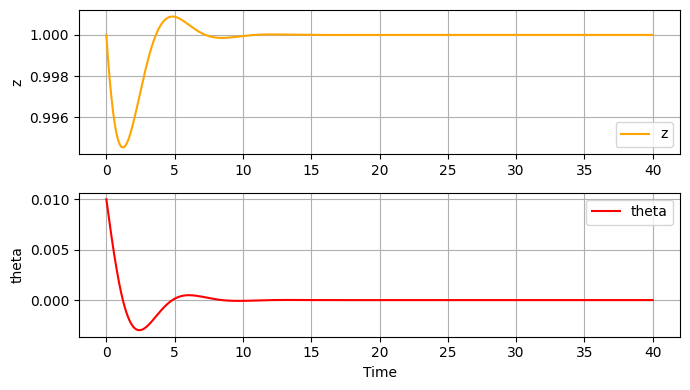

In [433]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt


# Linear System
def Sys_f_Linear(x, t=0):
  z = x[0]
  th = x[1]
  q = k1*(z-zd) - k2*th
  return np.array([ -vd*th, q])

# Generate 1000 linearly spaced points for t
t_end = 40
t = np.linspace(0, t_end, 1000)

# Initial values
#x0 = np.array([zd, 0.00], dtype=float)
x0 = np.array([zd, 0.01], dtype=float)

# Call odeint with parameters
x, infodict = integrate.odeint(Sys_f_Linear, x0, t, full_output=True)
# infodict['message']                       # integration successful



# Plot
fig, axs = plt.subplots(2, 1, figsize=(7, 4))

axs[0].plot(t, x[:, 0], label='z', color='orange')
axs[0].set_ylabel('z')
axs[0].grid(True)
axs[0].legend()

axs[1].plot(t, x[:, 1], label='theta', color='red')
axs[1].set_ylabel('theta')
axs[1].grid(True)
axs[1].legend()

plt.xlabel('Time')
plt.tight_layout()
plt.show()

**1.7**
Consider now the $\color{blue}{AUV\ model}$ $(x,z,w,\theta)$ in closed-loop with the control law (1).
Plot the **time-evolution** of the state  for different initial conditions.

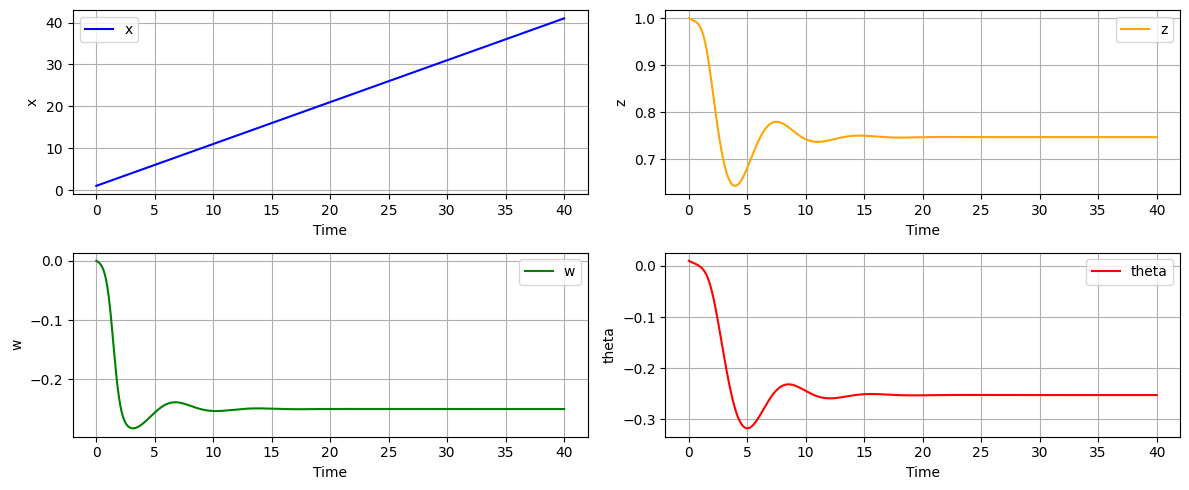

In [434]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

# Constants
vd = 1
d1 = -3
d2 = -12
m = 0.9
k1 = 1
k2 = 1
zd = 1

def Sys_f(x, t=0):
  z = x[1]
  w = x[2]
  th = x[3]
  q = k1*(z-zd) - k2*th
  dx1 = vd
  dx2 = -vd*np.tan(th) + w/np.cos(th)
  dx3 = -d1*w + d2*w*np.abs(w) + q*m*(vd/np.cos(th) - w*np.tan(th))
  dx4 = q
  return np.array([ dx1, dx2, dx3, dx4
                   ])

# generate 1000 linearly spaced points for t
t_end= 40
t = np.linspace(0, t_end,  1000)

# initial values:
#x0 = np.array([vd, zd, 0.00, 0.00])
x0 = np.array([vd, zd, 0.00, 0.01])

#  integrate.odeint
x = integrate.odeint(Sys_f, x0, t, full_output=False)



# Plot
fig, axs = plt.subplots(2, 2, figsize=(12, 5))

axs[0, 0].plot(t, x[:, 0], label='x', color='blue')
axs[0, 0].set_ylabel('x')
axs[0, 0].grid(True)
axs[0, 0].legend()

axs[0, 1].plot(t, x[:, 1], label='z', color='orange')
axs[0, 1].set_ylabel('z')
axs[0, 1].grid(True)
axs[0, 1].legend()

axs[1, 0].plot(t, x[:, 2], label='w', color='green')
axs[1, 0].set_ylabel('w')
axs[1, 0].grid(True)
axs[1, 0].legend()

axs[1, 1].plot(t, x[:, 3], label='theta', color='red')
axs[1, 1].set_ylabel('theta')
axs[1, 1].grid(True)
axs[1, 1].legend()

for ax in axs.flat:
    ax.set_xlabel('Time')

plt.tight_layout()
plt.show()